# Q1. Perform the following hypothesis testing for the below on the data from fitbit_data.csv  Download fitbit_data.csv 

    a. The null hypothesis is that the calories data is normally distributed (2 points) 

    b. By using the appropriate test, test the null hypothesis that the calories are not very different between males (0) and females (1). (4 points) 



In [148]:
import pandas as pd 
from scipy import stats

df_fitbit = pd .read_csv('fitbit_data.csv')
df_fitbit.head()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


In [149]:
#a.testing null hypothesis

In [150]:
stats.normaltest(df_fitbit['calories'])

NormaltestResult(statistic=1254.35232764979, pvalue=4.176888379371939e-273)

In [151]:
print('We reject the null hypothesis as p value is < 0.05 and shows statistical significance')

We reject the null hypothesis as p value is < 0.05 and shows statistical significance


In [152]:
# b. We perform 2 sample t test

In [153]:
female_calories = df_fitbit[df_fitbit['gender'] == 1]['calories']
male_calories = df_fitbit[df_fitbit['gender'] == 0]['calories']
stats.ttest_ind(female_calories, male_calories) 

Ttest_indResult(statistic=5.702442714534195, pvalue=1.2349261441908498e-08)

In [154]:
print('We performed 2 sample t test')

We performed 2 sample t test


# Q2. Create a Minkowski distance matrix for the following food classification data (4 points) 


In [155]:
import matplotlib.pyplot as plt
import numpy as np

def variance(X):
    mean = float(sum(X))/len(X)
    diffs = 0.0
    for x in X:
        diffs += (x - mean)**2
    return diffs/len(X)

def stdDev(X):
    return variance(X)**0.5
 
def minkowskiDist(v1, v2, p): 
    dist = 0.0
    for i in range(len(v1)):
        dist += abs(v1[i] - v2[i])**p
    return dist**(1.0/p)

class Food (object):
    def __init__(self, name, features):
        self.name = name
        self.features = np.array(features)
        
    def getName(self):
        return self.name
    
    def getFeatures(self):
        return self.features
    
    def distance(self, other):
        return minkowskiDist(self.getFeatures(),
                             other.getFeatures(), 1)

def compareFood(food, precision):
    columnLabels = []
    for a in food:
        columnLabels.append(a.getName())
    rowLabels = columnLabels[:]
    tableVals = []
    for a1 in food:
        row = []
        #For each column
        for a2 in food:
            if a1 == a2:
                row.append('--')
            else:
                distance = a1.distance(a2)
                row.append(str(round(distance, precision)))
        tableVals.append(row)
   
    table = plt.table(rowLabels = rowLabels,
                        colLabels = columnLabels,
                        cellText = tableVals,
                        cellLoc = 'center',
                        loc = 'center',
                        colWidths = [0.5]*len(food))
    table.scale(0.2, 2.0)
    plt.title('Manhattan Distance Between Food')

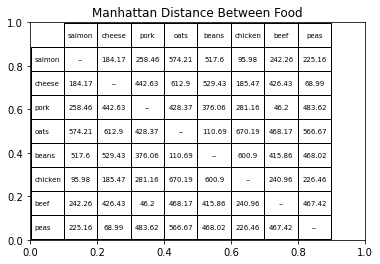

In [156]:
salmon = Food('salmon', [31, 8.2, 0, 89, 206])
cheese = Food('cheese', [18.58, 1.53, 4.08, 26, 108])
pork = Food('pork', [41.1, 25.56, 0, 120, 406])
oats = Food('oats', [25.34, 10.35, 99.4, 0, 584])
beans = Food('beans', [6.2, 0.3, 17.9, 0, 584])
chicken = Food('chicken', [36.64, 1.86, 0, 132, 165])
beef = Food('beef', [40.94, 22.52, 0, 135, 378])
peas = Food('peas', [8.13, 0.6, 21.69, 0, 122])

food = [salmon, cheese, pork, oats, beans, chicken, beef, peas]
compareFood (food,3)

# Q3. For the fitbit_data.csv dataset from Q1, create a correlation matrix. Identify the most appropriate method to find if there is a correlation between calories and distance. (4 points) 



In [157]:
correlation = df_fitbit.corr(method = 'spearman')
correlation

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance
Unnamed: 0,1.000000,0.447240,0.157459,-0.225263,-0.224853,-0.228696,-0.518660,-0.128983,0.367765,0.769979,0.073038,-0.014428,0.025611,0.419740,-0.147622,-0.159478,-0.151097,0.531784
X1,0.447240,1.000000,0.352707,-0.455324,-0.410065,-0.326663,0.089760,0.186781,-0.284641,0.000810,-0.078122,-0.352588,0.001339,-0.083589,0.292673,0.300794,0.373971,0.061941
age,0.157459,0.352707,1.000000,-0.319895,-0.494746,-0.169841,0.022940,0.007736,-0.145043,0.009161,-0.148143,-0.157869,-0.014721,0.044441,0.020439,0.056275,0.053571,0.026365
gender,-0.225263,-0.455324,-0.319895,1.000000,0.744466,0.625863,-0.024367,-0.142427,0.152586,-0.014070,0.205060,0.202071,-0.221580,-0.044350,-0.019953,-0.037949,-0.058753,-0.043238
height,-0.224853,-0.410065,-0.494746,0.744466,1.000000,0.704838,0.041236,-0.175311,0.130245,0.011994,0.188729,0.224209,-0.152660,0.000757,-0.114239,-0.143044,-0.116326,0.023465
weight,-0.228696,-0.326663,-0.169841,0.625863,0.704838,1.000000,0.105449,-0.111686,0.126499,0.003921,0.135655,0.084253,-0.072606,-0.058874,-0.093932,-0.107811,-0.066281,0.007260
steps,-0.518660,0.089760,0.022940,-0.024367,0.041236,0.105449,1.000000,0.219174,-0.348712,-0.269543,-0.128663,-0.154216,0.057044,-0.381897,0.248105,0.264148,0.285920,0.220429
hear_rate,-0.128983,0.186781,0.007736,-0.142427,-0.175311,-0.111686,0.219174,1.000000,-0.343740,-0.278243,-0.063501,-0.249182,0.500663,-0.260329,0.572105,0.623513,0.318184,-0.152713
calories,0.367765,-0.284641,-0.145043,0.152586,0.130245,0.126499,-0.348712,-0.343740,1.000000,0.573459,0.099427,0.280884,-0.060689,0.231400,-0.342403,-0.364549,-0.449993,0.351602
distance,0.769979,0.000810,0.009161,-0.014070,0.011994,0.003921,-0.269543,-0.278243,0.573459,1.000000,0.120923,0.175505,0.030327,0.443408,-0.354104,-0.368903,-0.351207,0.827001


In [158]:
# We use spearman method to determine correlation between 2 variables

In [175]:
import scipy.stats
print(scipy.stats.pearsonr(df_fitbit['calories'], df_fitbit['distance'])) 
print(scipy.stats.spearmanr(df_fitbit['calories'], df_fitbit['distance'])) 
print(scipy.stats.kendalltau(df_fitbit['calories'], df_fitbit['distance'])) 

(0.2551452384901195, 1.1556426128011878e-93)
SpearmanrResult(correlation=0.5734592617309869, pvalue=0.0)
KendalltauResult(correlation=0.4044796423697166, pvalue=0.0)


In [177]:
print('The most appropriate method to find correlation between calories and distance is Spearman but this method suggests that 2 variables are not correlated to each other')

The most appropriate method to find correlation between calories and distance is Spearman but this method suggests that 2 variables are not correlated to each other


# Q4. Perform k-means clustering by selecting the appropriate number of clusters for data

X = [30,44,32,30,33,33,31,22,30,34,57,54,57,43,50,47,59,52,65,57,49,48,35,53,44,45,38,43,51,46] and

Y = [19,51,53,38,59,74,73,57,69,45,51,32,10,47,53,36,35,58,29,50,25,20,14,32,26,5,29,27,8,7]. Use appropriate visualizations to show the clustering. (6 points) 

In [178]:
X = [30,44,32,30,33,33,31,22,30,34,57,54,57,43,50,47,59,52,65,57,49,48,35,53,44,45,38,43,51,46]

Y = [19,51,53,38,59,74,73,57,69,45,51,32,10,47,53,36,35,58,29,50,25,20,14,32,26,5,29,27,8,7]

import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

df = pd.DataFrame ({'X': X, 'Y': Y})
df.head()

,X,Y
0,30,19
1,44,51
2,32,53
3,30,38
4,33,59


In [179]:
vals = df.values

In [180]:
def kmeans(vals, k):
    diff = 1
    cluster = np.zeros(vals.shape[0])
    centroids = df.sample(n=k).values
    while diff:
        
        for i, row in enumerate(vals):
            mn_dist = float('inf')
            
            for idx, centroid in enumerate(centroids):
                d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
                
                if mn_dist > d:
                    mn_dist = d
                    cluster[i] = idx
        new_centroids = pd.DataFrame(vals).groupby(by=cluster).mean().values
        
        if np.count_nonzero(centroids-new_centroids) == 0:
            diff = 0
        else:
            centroids = new_centroids
    return centroids, cluster

In [181]:
k = 7
centroids, cluster = kmeans(vals, k)

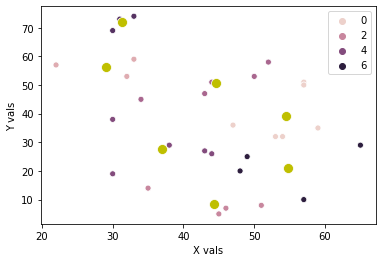

In [182]:
sns.scatterplot(vals[:,0], vals[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('X vals')
plt.ylabel('Y vals')
plt.show()